<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 4. <b>Статистика и </b> <span style="font-weight:bold; color:green">NumPy/SciPy</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><span style="color:red; font-weight:bold">ВНИМАНИЕ!</span> Варианты могут не совпадать с предыдущими ДЗ</p>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [76]:
surname = "Хуриев" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Задача 1.</b> Доверительный интервал</p>

<p>После присоединения Криптона было решено оценить в рублях среднюю стоимость бензина в его административном центре. Для этого случайно выбрали 50 заправок (далее - АЗС) из 1000 (значения приведены в файле oil_price_Krypton.csv). Определить с уверенностью в 95% границы, в которых заключено среднее значение стоимости бензина в административном центре, т.е. построить 95% доверительный интерал для средней цены на бензин? Постройте график по данным выборки с доверительным интервалом.</p>

In [77]:
import pandas as pnd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

#-----------------------------------------------

def getSE(sigma, n):
    return sigma / np.sqrt(n)

def getSE2(sigma1, n1, sigma2, n2):
    return np.sqrt(sigma1**2 / n1 + sigma2**2 / n2)

def getZ(x, mu, se):
    return (x - mu) / se

def getPrByX(x, mu, se):
    return stats.norm.cdf(x, loc=mu, scale=se)

def getPrByZ(z):
    return stats.norm.cdf(z, loc=0, scale=1)

def getZbyPr2Tail(pr):
    return stats.norm.ppf((1-pr)/2, loc=0, scale=1)

def getZbyPr1Tail(pr):
    return stats.norm.ppf(1-pr, loc=0, scale=1)

def getPValue1Tail_Norm(z):
    return 1 - stats.norm.cdf(z, loc=0, scale=1)

def getPValue2Tail_Norm(z):
    return 2 * (stats.norm.cdf(-abs(z), loc=0, scale=1))

def getPValue2Tail_T(t, df):
    return 2 * stats.t.cdf(-abs(t), df=df)

def getPValue1Tail_T(t, df):
    return 1 - stats.t.cdf(t, df=df)

#----------------------------------------------------------------------------

def getGraphTwo(xran, x_cr, typefunc=0, df=5, lm=0):
    x = np.linspace(xran[0], xran[1], 1000)
    y = []
    
    sdFunc = {0: stats.norm(loc=0, scale=1), 1: stats.t(df=df)}
    x_cr = abs(x_cr) 
    y = sdFunc[typefunc].pdf(x)   
    
    if lm == 0:
        pr = np.around(sdFunc[typefunc].cdf(x_cr) - sdFunc[typefunc].cdf(-x_cr), decimals=3)
        plt.axvspan(-x_cr, x_cr, color="g", alpha=0.1)
        plt.plot(x, y, lw=2, color="green")
        plt.title("Standard Normal Distribution") if typefunc==0 else plt.title("t-distribution")
        
        plt.fill_between(x, 0, y, where=y>sdFunc[typefunc].pdf(x_cr), facecolor='green', alpha=0.5)
        plt.axvline(-x_cr, color="black", linestyle="--")
        plt.axvline(x_cr, color="black", linestyle="--")
        
        plt.annotate("$\gamma("+str(np.around(x_cr, decimals=3))+")="+str(pr)+"$", (0.35,0.4), 
                     fontsize=14, xycoords='axes fraction')     
    
    elif lm == 1:
        pr = np.around(2*sdFunc[typefunc].cdf(-abs(x_cr)), decimals=3)
        plt.plot(x, y, lw=2, color="green")
        plt.axvspan(xran[0], -x_cr, color="g", alpha=0.1)
        plt.axvspan(x_cr, xran[1], color="g", alpha=0.1)
        plt.title("Standard Normal Distribution") if typefunc==0 else plt.title("t-distribution")
        
        plt.fill_between(x, 0, y, where=y<sdFunc[typefunc].pdf(x_cr), facecolor='green', alpha=0.5)
        plt.axvline(-x_cr, color="black", linestyle="--")
        plt.axvline(x_cr, color="black", linestyle="--")
        
        if typefunc == 1: 
            plt.annotate("$F_{two}("+str(np.around(x_cr, decimals=3))+")="+str(pr)+"$", fontsize=14, 
                     xy=(-2.6, 0.01), xycoords='data', xytext=(-1.5, 0.1))#, 
                             #arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
                #plt.annotate("", fontsize=14, xy=(2.6, 0.01), xycoords='data',
                #            xytext=(0.5, 0.09))#, arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
        else:
            plt.annotate("$2\cdot(1 - \Phi("+str(np.around(x_cr, decimals=3))+"))="+str(pr)+"$", 
                         (0.35,0.4), fontsize=14, xycoords='axes fraction')

        #plt.annotate("$\gamma=0.95$", (0.35,0.2), fontsize=14, xycoords='axes fraction')
        
    plt.grid(True)

In [78]:
simple = pnd.read_csv("oil_price_Krypton.csv")
x = simple.mean()
var = simple.var(ddof=1)
s = simple.std(ddof=1)
prs = np.array([0.95])
se = getSE(s, 50)
lowers, uppers = stats.norm.interval(prs, loc=x, scale=se)
for i in range(len(prs)):
    print("Доверительный интервал для математического ожидания с уровнем доверия %i%%: (%f, %f)" % (prs[i]*100, lowers[i], uppers[i]))

Доверительный интервал для математического ожидания с уровнем доверия 95%: (107.386567, 112.517433)


<center><div style="display:table; width:30%">
<div style="display:table-row;">
<div style="display:table-cell; padding:10px;">$\bar{x} - z \cdot SE_\bar{x}  \leq \mu_\bar{x} \leq \bar{x} + z \cdot SE_\bar{x}$</div>
</div>
</div></center>

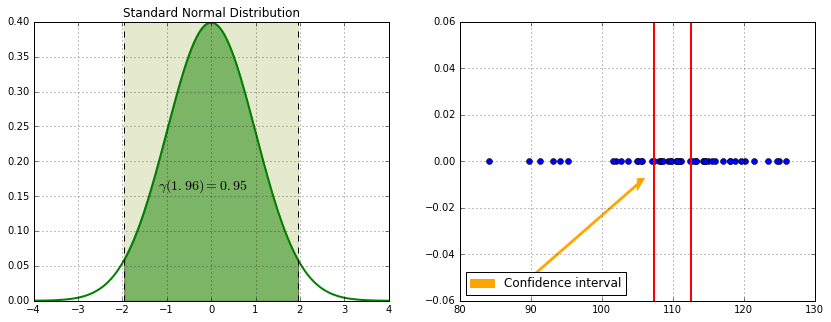

In [79]:
plt.figure(1, figsize=[14, 5])

plt.subplot(1,2,1)
xx = abs(stats.norm.ppf(0.05/2))
plt.axvspan(-xx, xx, color="orange", alpha=0.1)
getGraphTwo([-4,4], 1.96, lm=0)

#--------------------------------------------------------

plt.subplot(1,2,2)
plt.plot(simple, np.zeros(len(simple)), "o")
plt.axvline(107.386567, lw=2, color="red", linestyle="-")
plt.axvline(112.517433, lw=2, color="red", linestyle="-")
plt.arrow(90, -0.05, 15, 0.04, head_width=0.005, head_length=1, color="orange")
orange_patch = mpatches.Patch(color='orange', label='Confidence interval')
plt.legend(handles=[orange_patch], loc = 'lower left')
plt.grid(True)

plt.show()

<p><b>Задача 2.</b> Гипотеза</p>

<p>Решить двумя способами, как показано в Class_6_Examples_CI_Hyp.ipnb, т.е. самостоятельно по формулам и с использованием stats.ttest</p>

<p><b><i>Вариант 1</i></b></p>

<p>До присоединения Криптона в его административном центре средняя цена бензина в переводе на рубли была 90 рублей. Используя данные предыдущей выборки (значения приведены в файле oil_price_Krypton.csv), изменилась ли средняя цена после, т.е. постройте и оцените нулевую гипотезу при уровне значимости 0.05? Постройте график по данным выборки с указанием p-value и уровня значимости.</p>

In [ ]:
#Ваш код

<p><b><i>Вариант 2</i></b></p>

<p>В административном центре Криптона функционируют АЗС двух компнаний. Было решено оценить отличаются ли средние цены на бензин у этих компаний. Для этого случайно выбраны 50 территориальных единиц из 500, в которых присутвуют АЗС двух компаний (значения приведены в файле oil_price_two_companies.csv). Используя данные выборок, постройте и оцените нулевую гипотезу при уровне значимости 0.05? Постройте график по данным выборки с указанием p-value и уровня значимости.</p>   

In [114]:
df = pnd.read_csv("oil_price_two_companies.csv")
alpha = 0.05
n_items = 50
sample_items = np.array(df.sample(n_items))
sample_items
sample_diff = sample_items[:,0] - sample_items[:,1]
sample_diff

#Среднее значение
x_bar_diff = sample_diff.mean()
print("x_bar_diff =", x_bar_diff)

#Стандартное отклонение (несмещенное)
s_diff = sample_diff.std(ddof=1)
print("s_diff =", s_diff)

#Стандартная ошибка
se_diff = getSE(s_diff, n_items)
print("se_diff =", se_diff)

#Z-score
z = getZ(x_bar_diff, 0, se_diff)
print(z)

#P-Value 
pvalue = getPValue2Tail_Norm(z)
print(pvalue)

#P-Value для t-распределения
df = n_items - 1 
pvalue_t = getPValue2Tail_T(z, df)
print(pvalue_t)

x_bar_diff = -2.486
s_diff = 6.20911147477
se_diff = 0.878100965791
-2.83110951571
0.00463868352353
0.00671014239457


In [115]:
tvalue, pvalue_t = stats.ttest_rel(sample_items[:,0], sample_items[:,1])
print("t-value =", tvalue)
print("p-value =", pvalue_t)
pvalue_t = 2 * stats.t.cdf(-abs(tvalue), df)
pvalue_t

t-value = -2.83110951571
p-value = 0.00671014239457


0.0067101423945682206

In [116]:
if alpha > pvalue:
    print("alpha > p-value")
    print("Отказываемся от нулевую гипотезы в пользу альтернативной")
else:
    print("alpha <= p-value")
    print("Принимаем нулевую гипотезу (не отказываемся от нулевой гипотезы)")

alpha > p-value
Отказываемся от нулевую гипотезы в пользу альтернативной


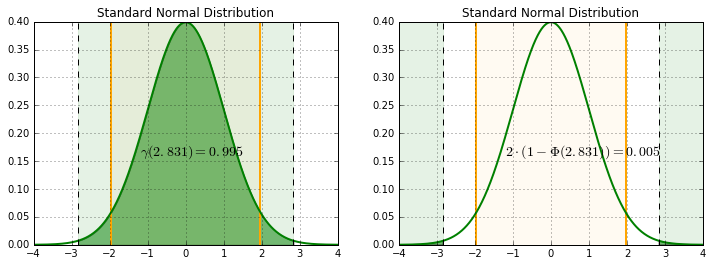

In [110]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
xx = abs(stats.norm.ppf(alpha/2, loc=0, scale=1))
plt.axvline(-xx, lw=2, color="orange", linestyle="-")
plt.axvline(xx, lw=2, color="orange", linestyle="-")
plt.axvspan(-xx, xx, color="orange", alpha=0.05)
getGraphTwo([-4,4], z, lm=0)

plt.subplot(1,2,2)
plt.axvline(-xx, lw=2, color="orange", linestyle="-")
plt.axvline(xx, lw=2, color="orange", linestyle="-")
plt.axvspan(-xx, xx, color="orange", alpha=0.05)
getGraphTwo([-4,4], z, lm=1)

plt.show()

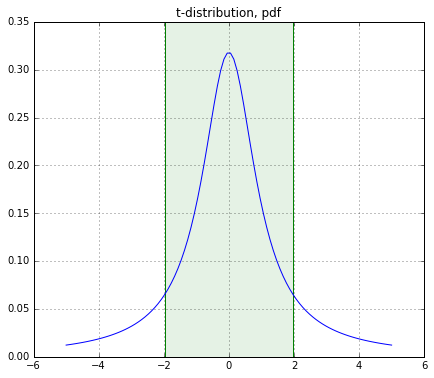

In [121]:
x = np.linspace(-5, 5, 100)
y_pdf = stats.norm.pdf(x, loc=0, scale=1)
y_cdf = stats.norm.cdf(x, loc=0, scale=1)
adf = [1]
plt.figure(1, figsize=[7, 6])
plt.subplot(1,1,1)
plt.title("t-distribution, pdf")
xx = abs(stats.norm.ppf(alpha/2, loc=0, scale=1))
plt.axvline(-xx, lw=1, color="green", linestyle="-")
plt.axvline(xx, lw=1, color="green", linestyle="-")
plt.axvspan(-xx, xx, color="green", alpha=0.1)
plt.plot(x,pd)
plt.grid(True)

<p><b><i>Вариант 3</i></b></p>

<p>После присоединения Криптона было решено сравнить среднюю стоимость бензина в его административном центре и в центральном федеральном округе (далее - ЦФО). Для этого случайно выбрали 50 заправок на Криптоне и 60 в ЦФО (значения приведены в файле oil_price_two_districts.csv). Используя данные выборок, отличается ли средняя цена на Криптоне и в ЦФО при уровне значимости 0.05, т.е. постройте и оцените нулевую гипотезу? Постройте график по данным выборки с указанием p-value и уровня значимости.</p>

In [ ]:
#Ваш код